In [1]:
import jieba

# 讀取文件
with open('hw1-dataset.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 斷詞
words = jieba.cut(text)

# 將斷詞結果轉換為列表
word_list = list(words)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 0.799 seconds.
DEBUG:jieba:Loading model cost 0.799 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [2]:
from collections import Counter

# 計算詞頻
word_count = Counter(word_list)

# 取出前100個高頻詞
top100_word_freq = word_count.most_common(100)
#top100_word_freq

In [3]:
import jieba.analyse

# 計算TF-IDF權重
tfidf = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

In [4]:
#for i, word in enumerate(tfidf):
    #print(f"{i+1}. {word[0]}: {word[1]}")

In [5]:
import warnings
warnings.filterwarnings("ignore")


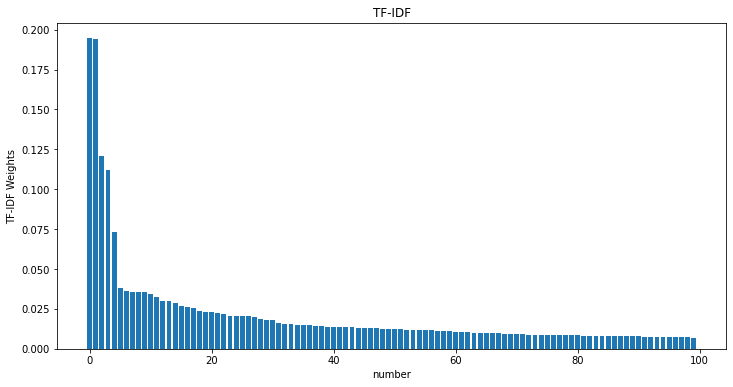

In [6]:
# 繪製TF-IDF圖
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
x = range(len(top100_word_freq))
y = [i[1] for i in tfidf]
plt.bar(x, y)
plt.xlabel("number")
plt.ylabel("TF-IDF Weights")
plt.title("TF-IDF")
plt.show()

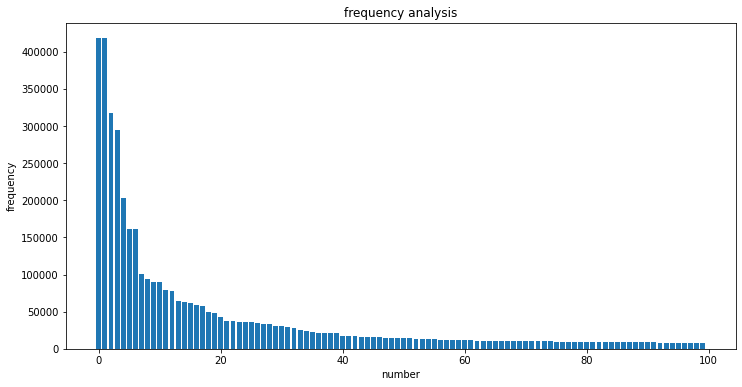

In [7]:
# 繪製頻率圖
plt.figure(figsize=(12, 6))

x = range(len(top100_word_freq))
y = [i[1] for i in top100_word_freq]

plt.xlabel("number")
plt.ylabel("frequency")
plt.title("frequency analysis")
plt.bar(x, y)
plt.show()

In [8]:
!sudo apt-get install -y fonts-arphic-uming


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-arphic-uming is already the newest version (0.2.20080216.2-10ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [9]:
from wordcloud import WordCloud, STOPWORDS
top32_words = [pair[0] for pair in tfidf[:32]]



In [10]:
import matplotlib.font_manager as fm

# 設置中文字體路徑
font_path = '/usr/share/fonts/truetype/arphic/uming.ttc'

# 設置字體
font_prop = fm.FontProperties(fname=font_path)

# 設置字體為系統默認字體
plt.rcParams['font.family'] = font_prop.get_name()



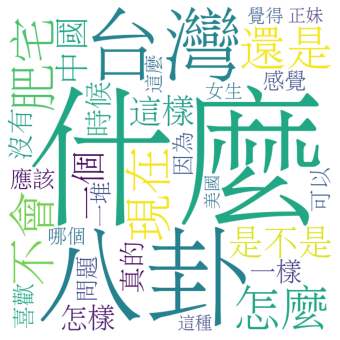

In [11]:
wordcloud = WordCloud(font_path=font_path, width=600, height=600, background_color='white').generate(' '.join(top32_words))

# 繪製文字雲
plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()